### Generación de los vídeos de ejecución de los modelos y de las gráficas de evaluación durante el entrenamiento de multiwalker

In [6]:
import imageio
from stable_baselines3.ppo import CnnPolicy, MlpPolicy, MultiInputPolicy
from stable_baselines3 import PPO
from pettingzoo.sisl import multiwalker_v9
import supersuit as ss
import cv2
import numpy as np


env = multiwalker_v9.env(render_mode='rgb_array')
env = ss.frame_stack_v1(env, 3)


model = PPO.load("./multiwalker/results/multiwalker_ppo_04_2_log_eval/best_model")

images = []
obs = env.reset()
img = env.render()
env.reset()
for agent in env.agent_iter():
   images.append(img)
   obs, reward, done, info,_ = env.last()
   act = model.predict(obs, deterministic=True)[0] if not done else None
   env.step(act)
#    env.render()
   img = env.render()

imageio.mimsave('ppo_multiw.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)


In [4]:
import imageio
from stable_baselines3.ppo import CnnPolicy, MlpPolicy, MultiInputPolicy
from stable_baselines3 import SAC
from pettingzoo.sisl import multiwalker_v9
import supersuit as ss
import cv2
import numpy as np


env = multiwalker_v9.env(render_mode='rgb_array')
env = ss.frame_stack_v1(env, 3)


model = SAC.load("./multiwalker/results/multiwalker_sac_00_log_eval/best_model")

images = []
obs = env.reset()
img = env.render()
env.reset()
for agent in env.agent_iter():
   images.append(img)
   obs, reward, done, info,_ = env.last()
   act = model.predict(obs, deterministic=True)[0] if not done else None
   env.step(act)
#    env.render()
   img = env.render()

imageio.mimsave('sac_multiw.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)


In [2]:
import imageio
from stable_baselines3.ppo import CnnPolicy, MlpPolicy, MultiInputPolicy
from stable_baselines3 import SAC
from pettingzoo.sisl import multiwalker_v9
import supersuit as ss
import cv2
import numpy as np


env = multiwalker_v9.env(render_mode='rgb_array')
env = ss.frame_stack_v1(env, 3)


model = SAC.load("./multiwalker/results/multiwalker_sac_00_log_eval_extra2/best_model")

images = []
obs = env.reset()
img = env.render()
env.reset()
for agent in env.agent_iter():
   images.append(img)
   obs, reward, done, info,_ = env.last()
   act = model.predict(obs, deterministic=True)[0] if not done else None
   env.step(act)
#    env.render()
   img = env.render()

imageio.mimsave('sac_multiw_extra2.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)


Creación de las gráficas de evaluación durante el entrenamiento

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_train_policy(file_csv, y_axis,title,y_title):
    data = pd.read_csv(file_csv)

    
    plt.figure(figsize=(10, 6)) 

    
    plt.plot(data['time/total_timesteps'], data[y_axis], marker='o', linestyle='-')

    plt.title(title)
    plt.xlabel('Timesteps')
    plt.ylabel(y_title)
    plt.grid(True)

    plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_train_policy_reg_line(file_csv, y_axis,title,y_title):
    data = pd.read_csv(file_csv)


    
    sns.lmplot(x='time/total_timesteps',y=y_axis,data=data,fit_reg=True,line_kws={"color": "red"})
    

    plt.title(title)
    plt.xlabel('Timesteps')
    plt.ylabel(y_title)
    plt.grid(True) 

    plt.show()

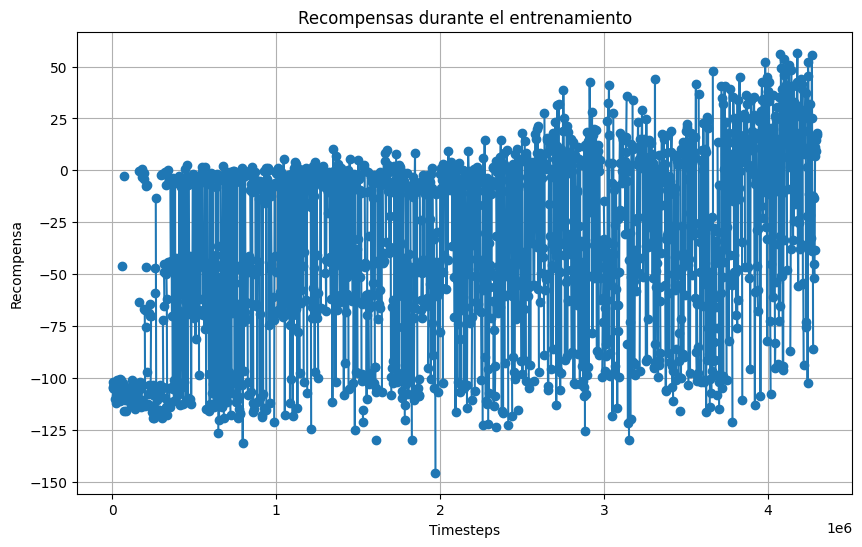

In [13]:
plot_train_policy("./multiwalker/results/multiwalker_sac2_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

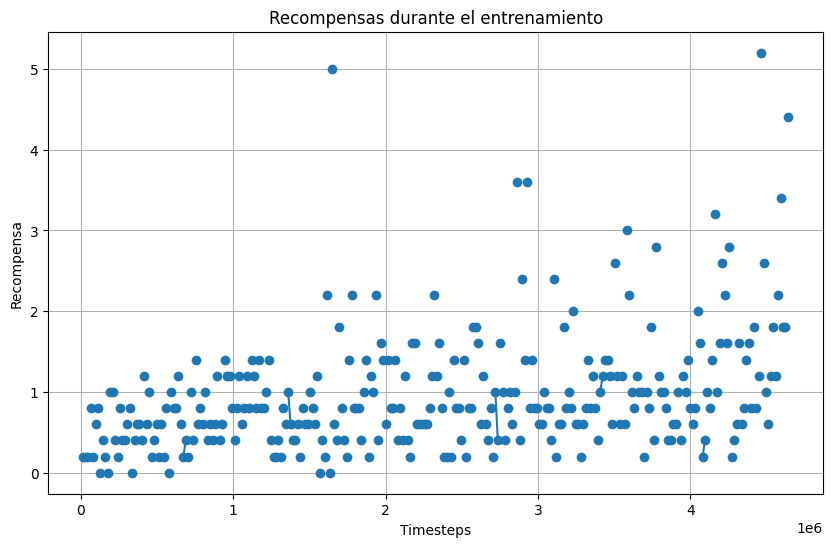

In [19]:
plot_train_policy("policies_PPO/policy_new_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

In [ ]:
##### Debido a al construcción del juego y sus recompensas, se observan tres "ramas" dentro  de las gráficas 
##### (se les cae la carga, se cae un robot o consiguen mantanerse en pie)
##### Debido a la exploración que hacen los algoritmos, pueden acabar en cualquiera de estos tres escenarios
##### pero conforme van aprendiendo, fallan menos

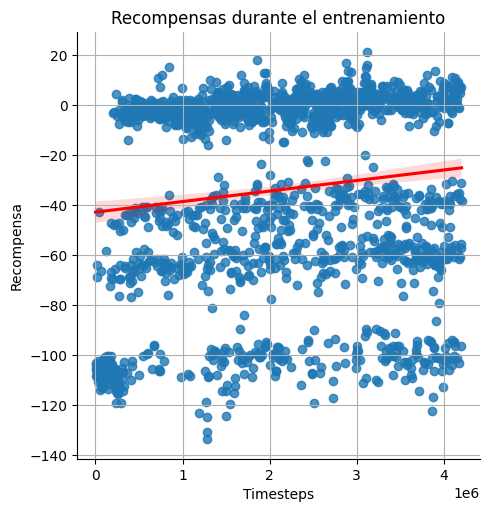

In [5]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

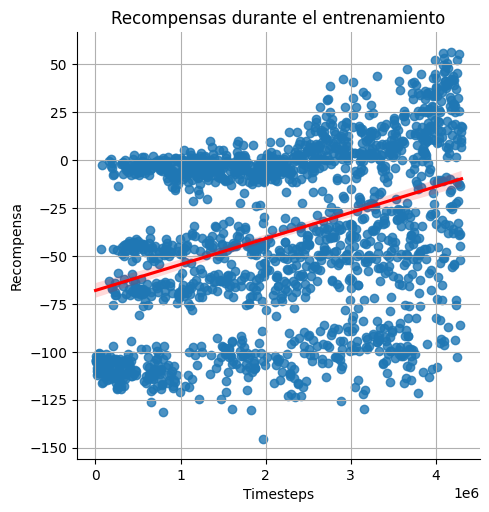

In [14]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac2_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

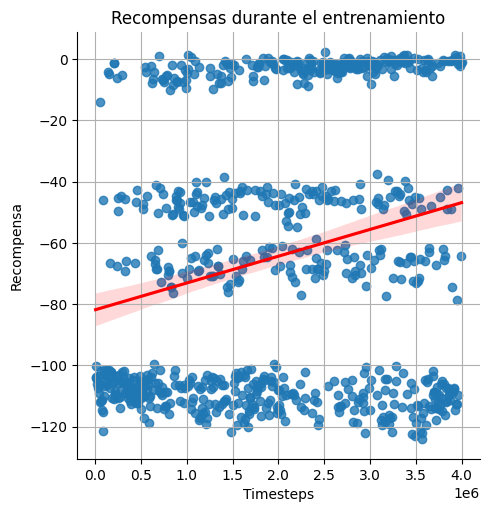

In [6]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac3_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

In [14]:
from numpy import load

data = load('./multiwalker/results/multiwalker_ppo_2_log_eval/evaluations.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])
type(data)

timesteps
[  12000   24000   36000   48000   60000   72000   84000   96000  108000
  120000  132000  144000  156000  168000  180000  192000  204000  216000
  228000  240000  252000  264000  276000  288000  300000  312000  324000
  336000  348000  360000  372000  384000  396000  408000  420000  432000
  444000  456000  468000  480000  492000  504000  516000  528000  540000
  552000  564000  576000  588000  600000  612000  624000  636000  648000
  660000  672000  684000  696000  708000  720000  732000  744000  756000
  768000  780000  792000  804000  816000  828000  840000  852000  864000
  876000  888000  900000  912000  924000  936000  948000  960000  972000
  984000  996000 1008000 1020000 1032000 1044000 1056000 1068000 1080000
 1092000 1104000 1116000 1128000 1140000 1152000 1164000 1176000 1188000
 1200000 1212000 1224000 1236000 1248000 1260000 1272000 1284000 1296000
 1308000 1320000 1332000 1344000 1356000 1368000 1380000 1392000 1404000
 1416000 1428000 1440000 1452000 1464000 

numpy.lib.npyio.NpzFile

In [20]:
time_total_timesteps = data['timesteps']
eval_mean_reward = data['results']
eval_mean_ep_length = data['ep_lengths']

# Calculate the mean of the second dimension of eval_mean_reward and eval_mean_ep_length
eval_mean_reward_mean = np.mean(eval_mean_reward, axis=1)
eval_mean_ep_length_mean = np.mean(eval_mean_ep_length, axis=1)

# Create a Pandas DataFrame with these arrays
df = pd.DataFrame({
    'time/total_timesteps': time_total_timesteps,
    'eval/mean_reward': eval_mean_reward_mean,
    'eval/mean_ep_length': eval_mean_ep_length_mean
})



In [21]:
# Save the DataFrame as a CSV file
df.to_csv("./multiwalker/results/multiwalker_ppo_2_log_eval/progress.csv", index=False)

In [ ]:
#time/total_timesteps
#eval/mean_reward
#eval/mean_ep_length

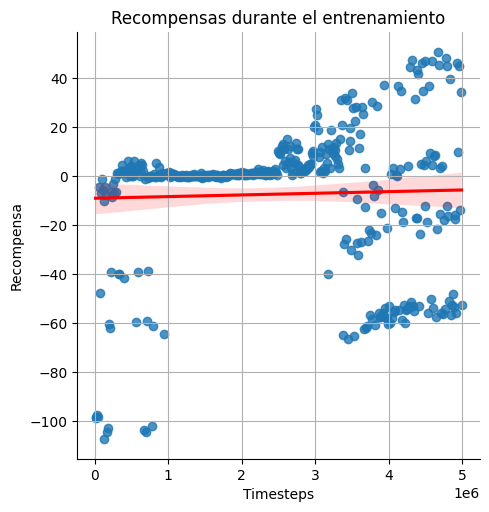

In [8]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

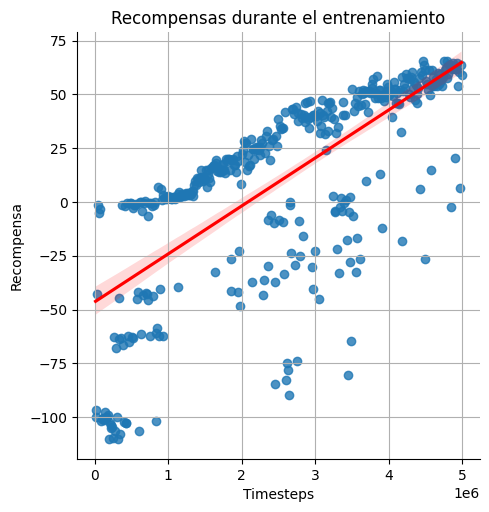

In [22]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_2_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

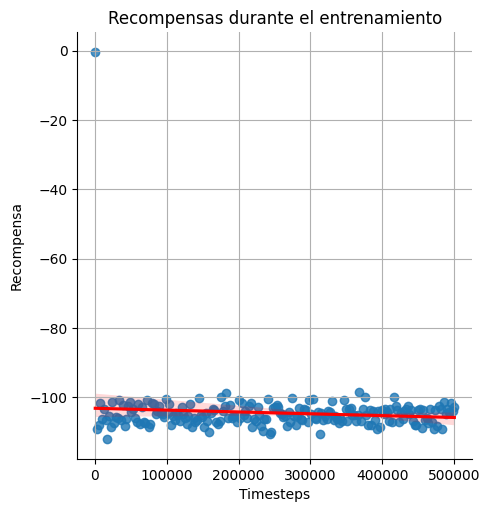

In [9]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ddpg_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

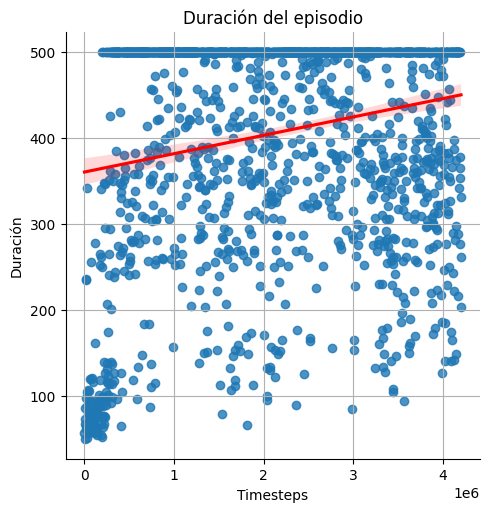

In [3]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

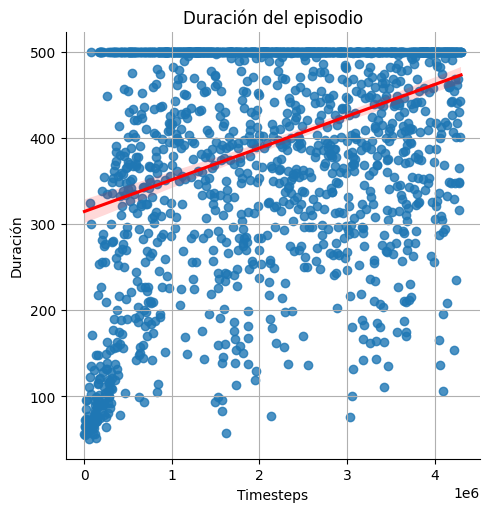

In [4]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac2_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

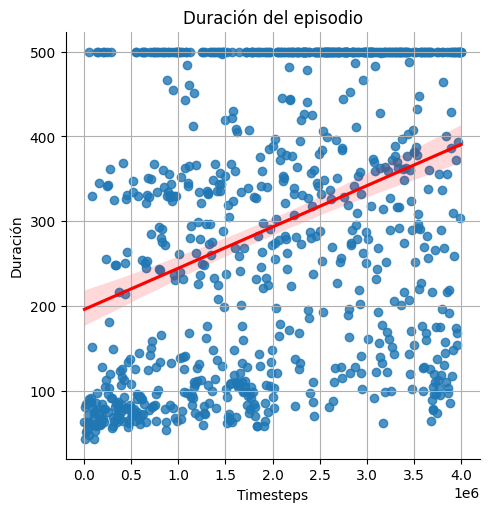

In [5]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac3_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

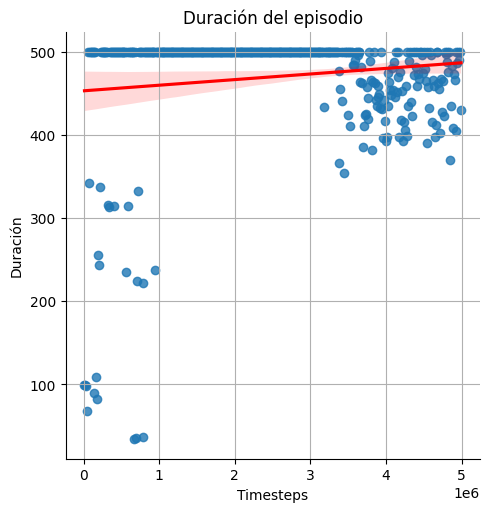

In [6]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

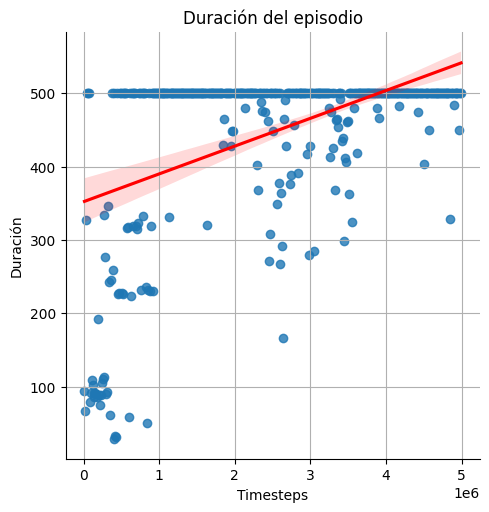

In [7]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_2_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

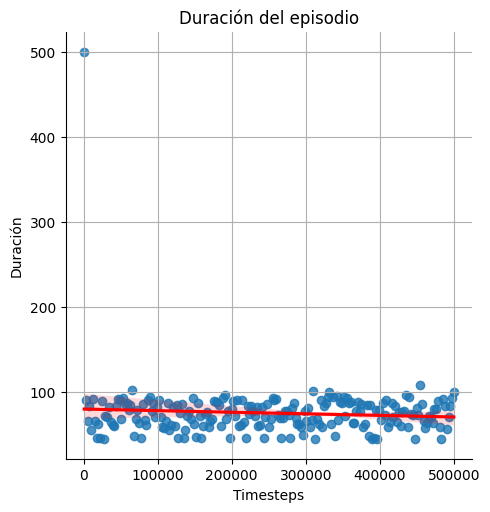

In [8]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ddpg_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

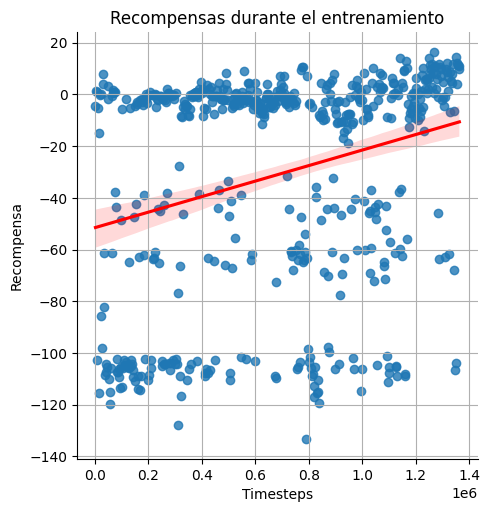

In [6]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ddpg2_5_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

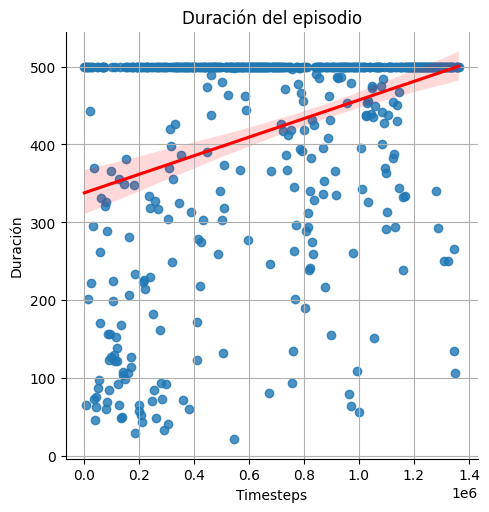

In [7]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ddpg2_5_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

# Evaluación con recompensas mixtas e individuales

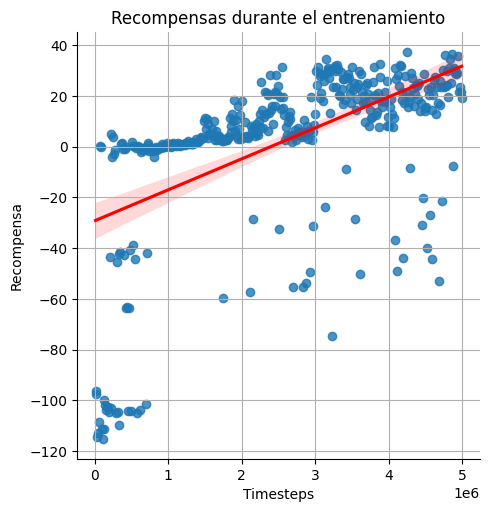

In [8]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_0_2_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

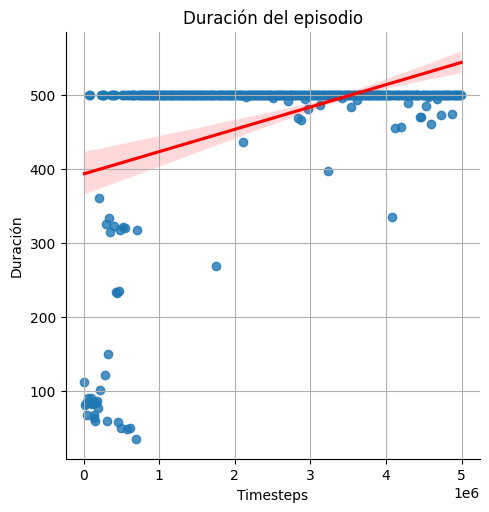

In [9]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_0_2_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

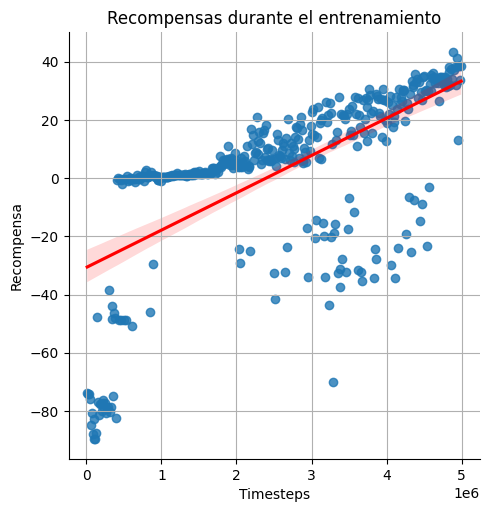

In [10]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_04_2_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

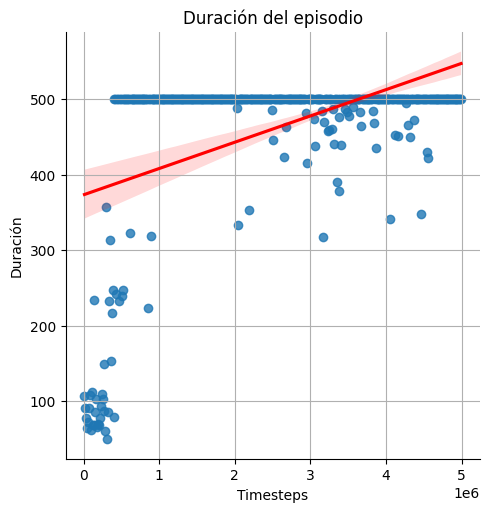

In [11]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_04_2_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

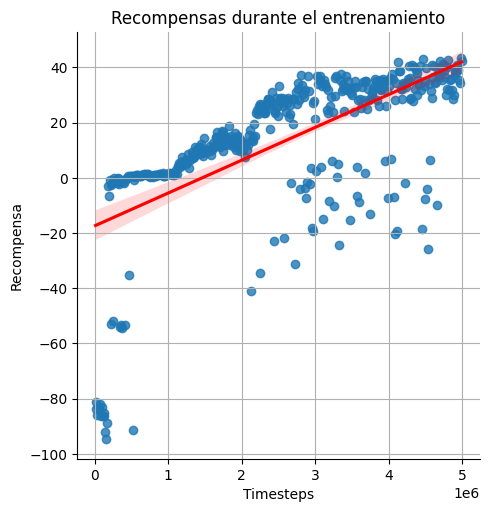

In [12]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_08_2_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

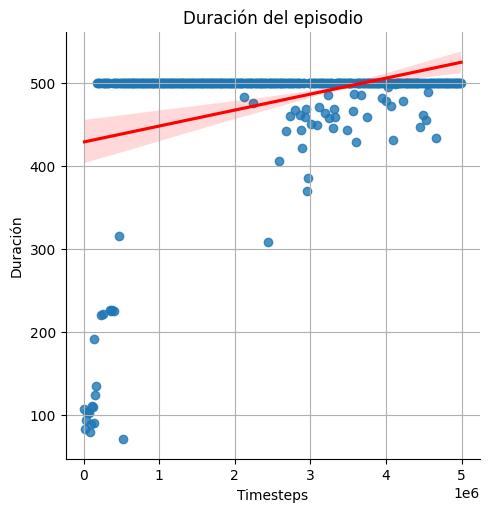

In [13]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_08_2_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

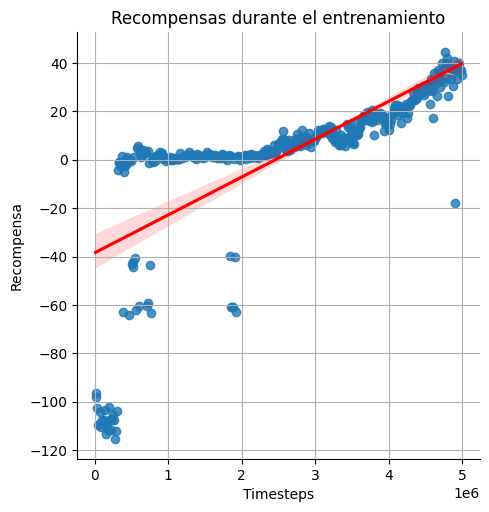

In [14]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_rew_0_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

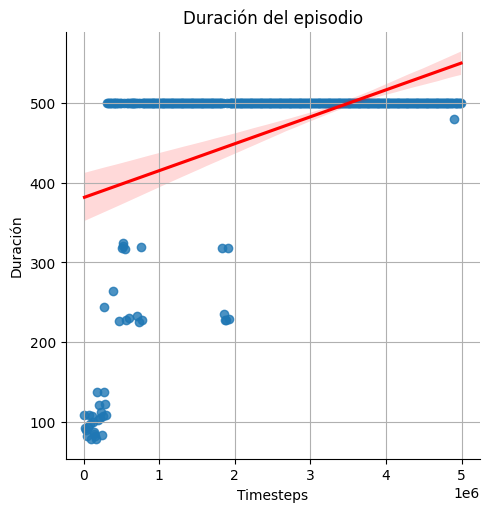

In [15]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_rew_0_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

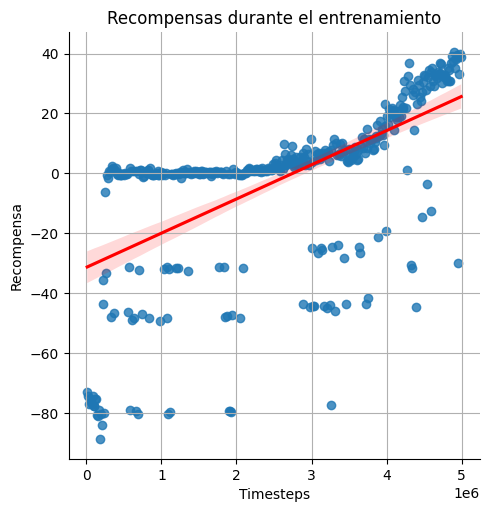

In [16]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_rew_04_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

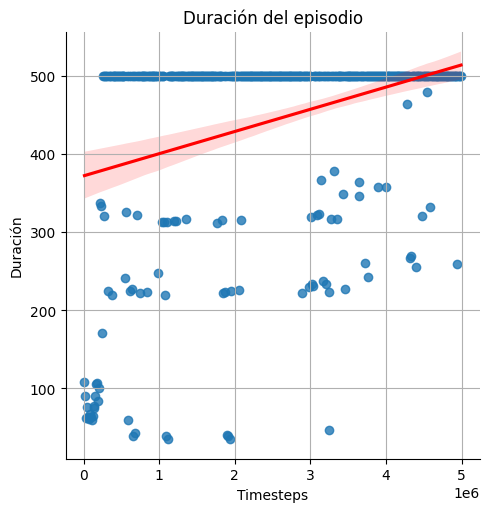

In [17]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_rew_04_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

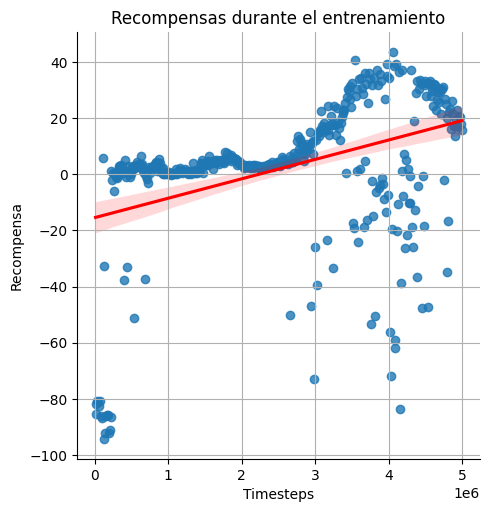

In [18]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_rew_08_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

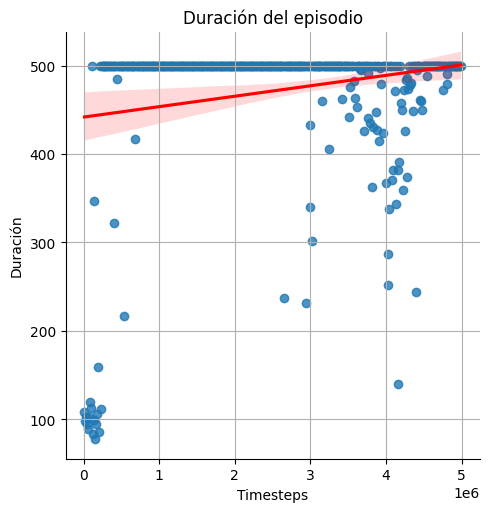

In [19]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_ppo_rew_08_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

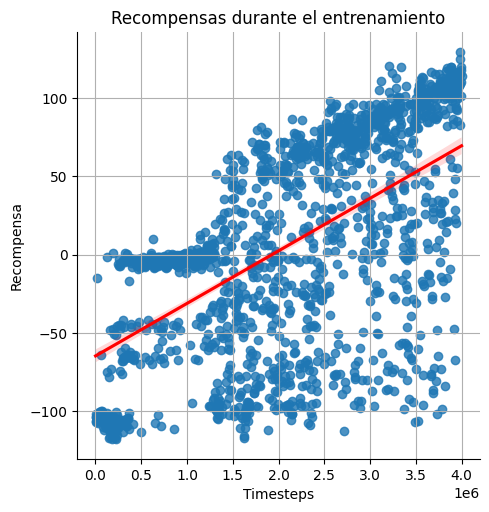

In [20]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac_00_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

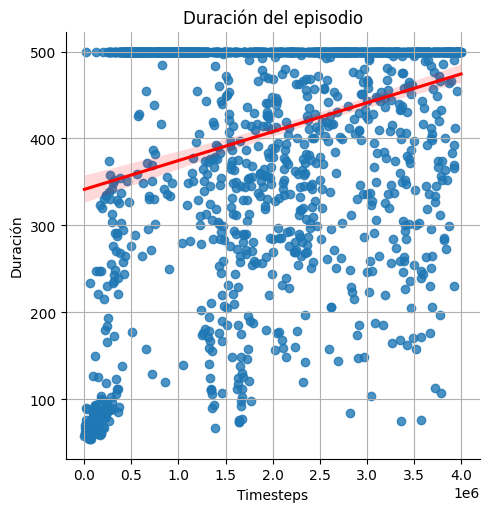

In [21]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac_00_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

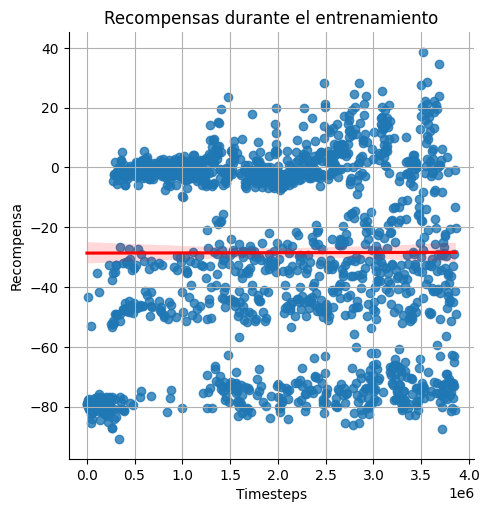

In [22]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac_04_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

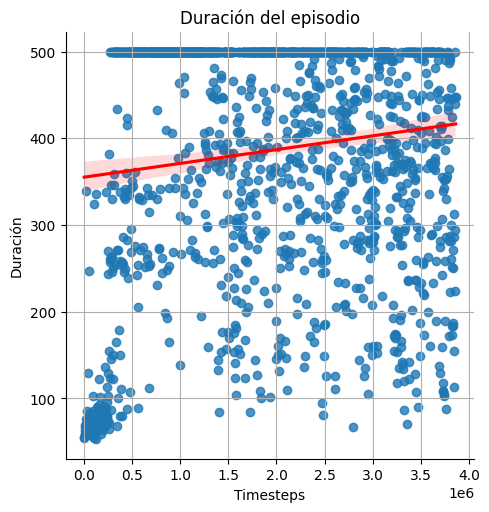

In [23]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac_04_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

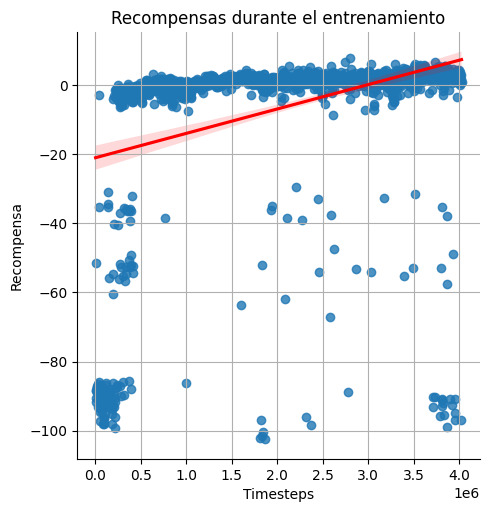

In [24]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac_08_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

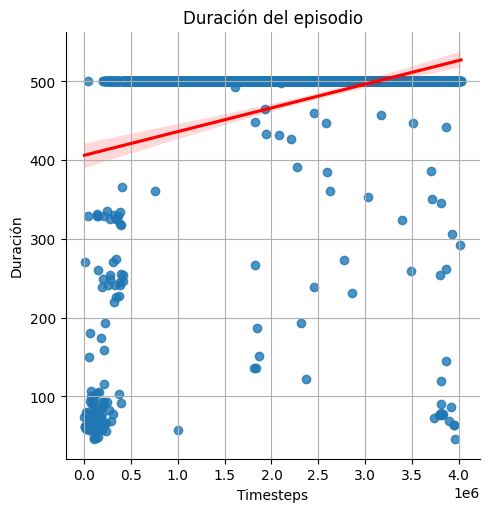

In [25]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac_08_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

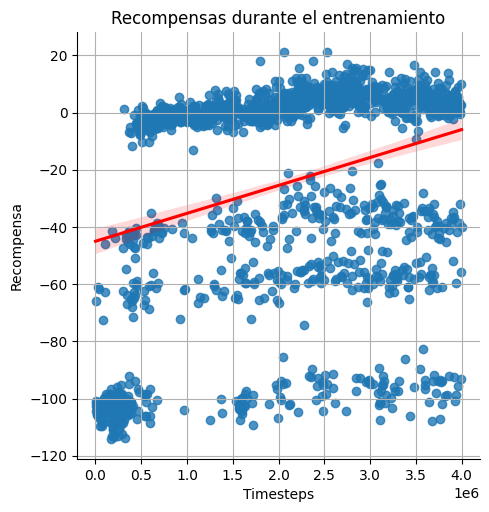

In [26]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac2_00_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

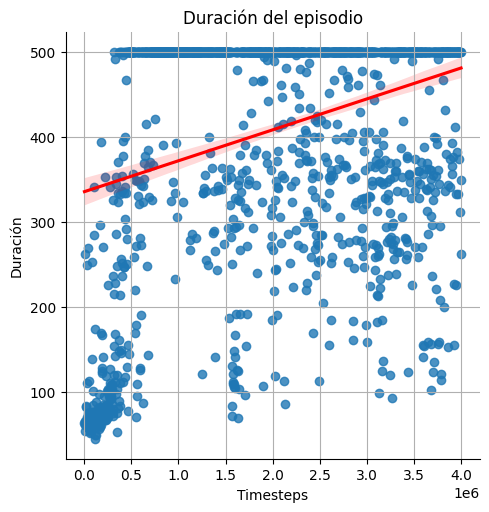

In [27]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac2_00_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

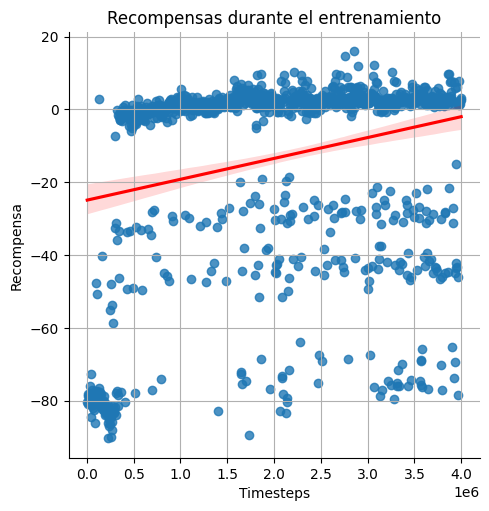

In [28]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac2_04_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

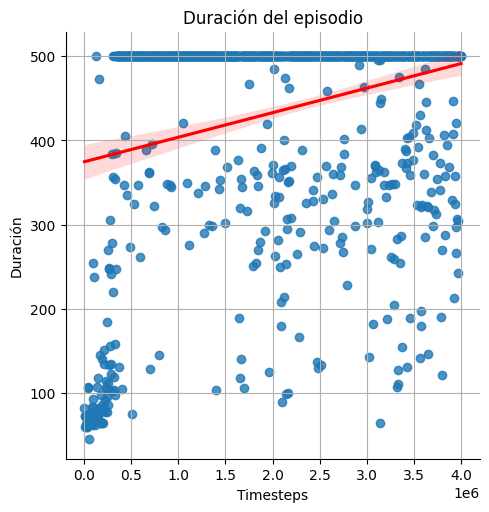

In [29]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac2_04_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

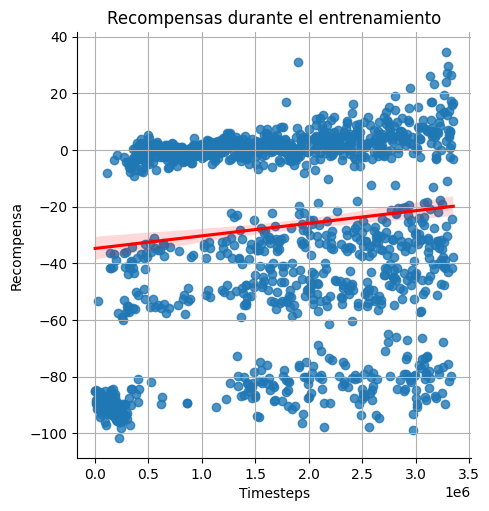

In [30]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac2_08_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

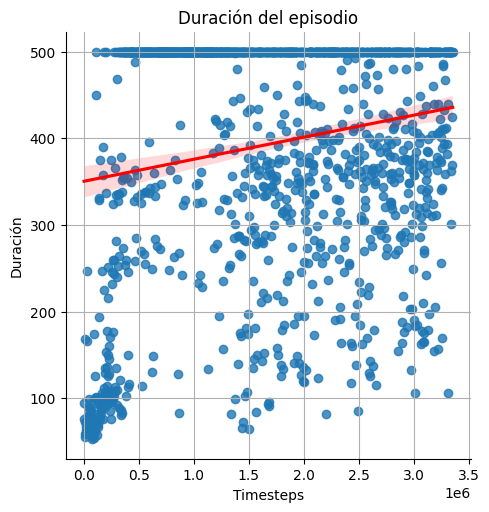

In [31]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac2_08_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

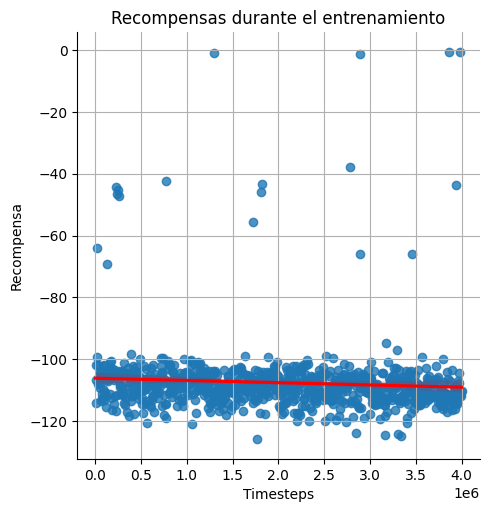

In [42]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac3_00_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

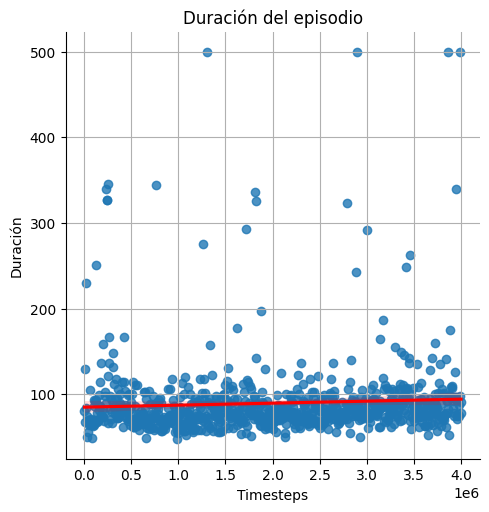

In [43]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac3_00_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

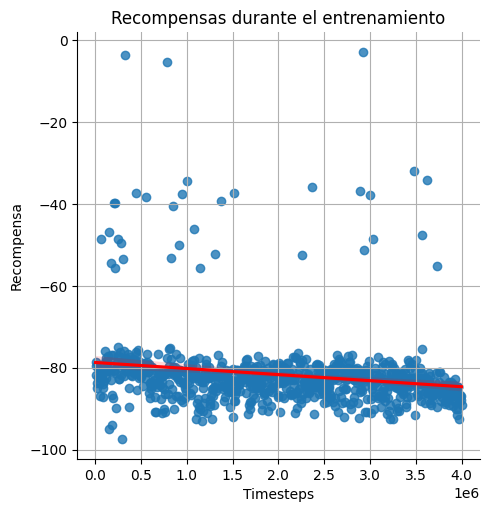

In [33]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac3_04_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

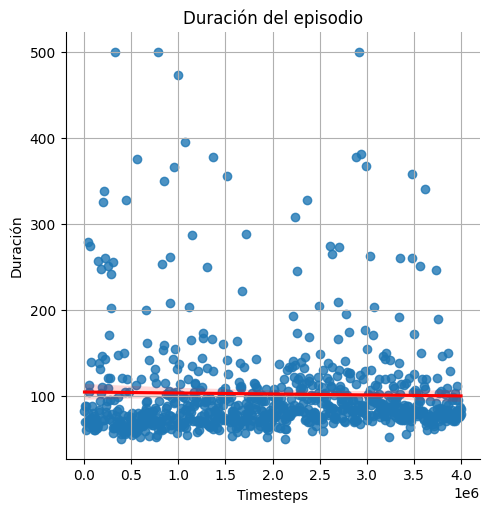

In [34]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac3_04_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

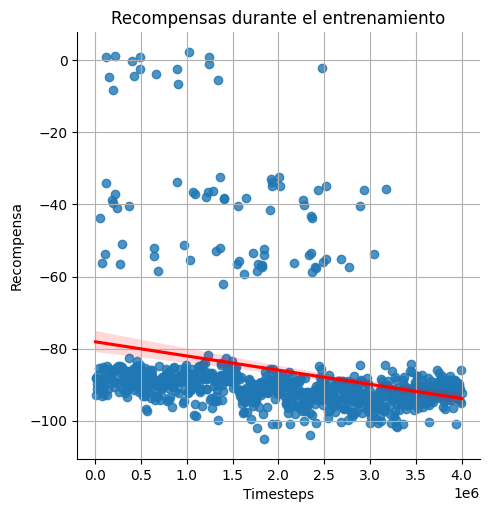

In [44]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac3_08_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

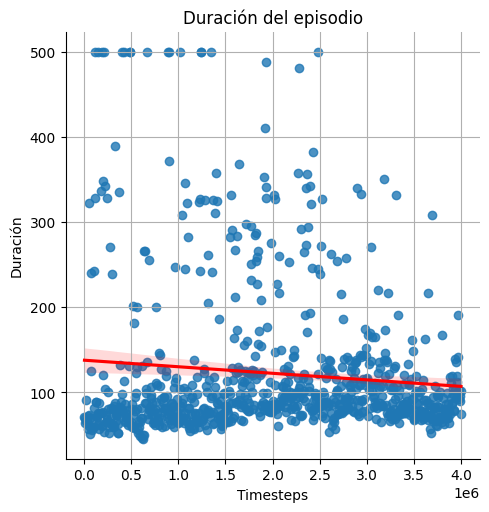

In [45]:
plot_train_policy_reg_line("./multiwalker/results/multiwalker_sac3_08_log_eval/progress.csv",'eval/mean_ep_length','Duración del episodio','Duración')

In [36]:
from numpy import load

data = load('./multiwalker/results/multiwalker_sac3_00_log_eval/evaluations.npz')
lst = data.files
# for item in lst:
#     print(item)
#     print(data[item])
type(data)

numpy.lib.npyio.NpzFile

In [37]:
time_total_timesteps = data['timesteps']
eval_mean_reward = data['results']
eval_mean_ep_length = data['ep_lengths']

# Calculate the mean of the second dimension of eval_mean_reward and eval_mean_ep_length
eval_mean_reward_mean = np.mean(eval_mean_reward, axis=1)
eval_mean_ep_length_mean = np.mean(eval_mean_ep_length, axis=1)

# Create a Pandas DataFrame with these arrays
df = pd.DataFrame({
    'time/total_timesteps': time_total_timesteps,
    'eval/mean_reward': eval_mean_reward_mean,
    'eval/mean_ep_length': eval_mean_ep_length_mean
})



In [38]:
# Save the DataFrame as a CSV file
df.to_csv("./multiwalker/results/multiwalker_sac3_00_log_eval/progress.csv", index=False)

In [39]:
from numpy import load

data = load('./multiwalker/results/multiwalker_sac3_08_log_eval/evaluations.npz')
lst = data.files
# for item in lst:
#     print(item)
#     print(data[item])
type(data)

numpy.lib.npyio.NpzFile

In [40]:
time_total_timesteps = data['timesteps']
eval_mean_reward = data['results']
eval_mean_ep_length = data['ep_lengths']

# Calculate the mean of the second dimension of eval_mean_reward and eval_mean_ep_length
eval_mean_reward_mean = np.mean(eval_mean_reward, axis=1)
eval_mean_ep_length_mean = np.mean(eval_mean_ep_length, axis=1)

# Create a Pandas DataFrame with these arrays
df = pd.DataFrame({
    'time/total_timesteps': time_total_timesteps,
    'eval/mean_reward': eval_mean_reward_mean,
    'eval/mean_ep_length': eval_mean_ep_length_mean
})



In [41]:
# Save the DataFrame as a CSV file
df.to_csv("./multiwalker/results/multiwalker_sac3_08_log_eval/progress.csv", index=False)